In [164]:
import numpy as np
from scipy import signal
import statsmodels.api
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARMA
import statsmodels.graphics.tsaplots as sgt
from scipy.stats.distributions import chi2
import pandas as pd

In [162]:
def llr_test2(L1, L2, DF=1):
    LR = 2*(L2-L1)
    return chi2.sf(LR, DF).round(3)

## Write a function that generates $ARMA(p,q)$ time series

In [170]:
def generate_ARMA(c, ar, ma, nsample, x0):
    """ Generates ARMA time series
    Args:
        c (float) - constant
        ar (list) - list of parameters for AR model
        ma (list) - list of parameters for MA model
        nsamples (int) - numeber of points to generate including x0
        x0 (float) - initial point for time series.
        
    Returns
        x (list) - list of generated points
    """
    np.random.seed(44)
    noise = np.random.normal(size=nsample)
    x = np.zeros(nsample)
    x[0] = c + x0 + noise[0]
    for i in range(1, nsample):
        loc_ar = ar[-i:]
        loc_ma = ma[-i:]
        reg = np.matmul(loc_ar, x[i-len(loc_ar):i])
        avrg = np.matmul(loc_ma, noise[i-len(loc_ma):i])
        x[i] = c + reg + avrg + noise[i]
        
    return x

## Generate several time series with different values of model’s parameters. Plot ACF and PACF. Analyze the plots.

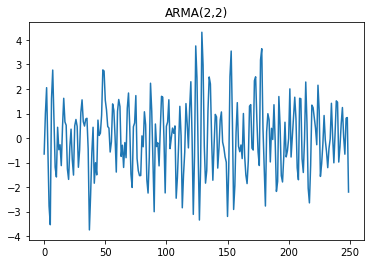

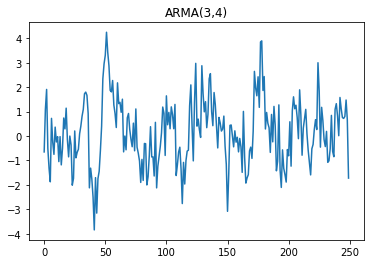

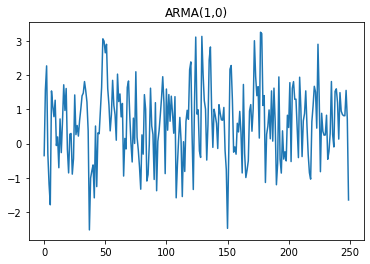

In [175]:
# ARMA(2,2) model
ar1 = np.array([-.75, .25])
ma1 = np.array([.65, .35])
y1 = generate_ARMA(0.1, ar1, ma1, 250, 0)
# ARMA(3,4) model
ar2 = np.array([0.1, -.35, .9])
ma2 = np.array([0.13, 0.22, .25, -.35])
y2 = generate_ARMA(0.1, ar2, ma2, 250, 0)
# AR(1) model
ar3 = np.array([0.4])
ma3 = np.array([])
y3 = generate_ARMA(0.4, ar3, ma3, 250, 0)
df = pd.DataFrame({"ARMA(2,2)":y1, "ARMA(3,4)": y2, "ARMA(1,0)": y3})
df['ARMA(2,2)'].plot()
plt.title("ARMA(2,2)")
plt.show()
df['ARMA(3,4)'].plot()
plt.title("ARMA(3,4)")
plt.show()
df['ARMA(1,0)'].plot()
plt.title("ARMA(1,0)")
plt.show()

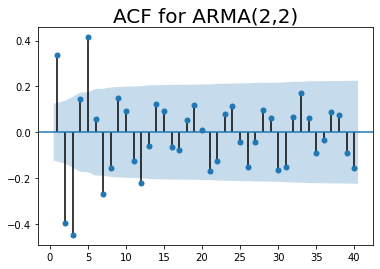

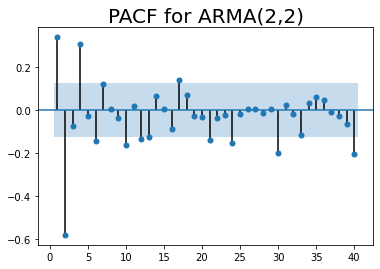

In [177]:
sgt.plot_acf(df['ARMA(2,2)'], lags=40, zero=False)
plt.title("ACF for ARMA(2,2)", size=20)
plt.show()
sgt.plot_pacf(df['ARMA(2,2)'], lags=40, zero=False);
plt.title("PACF for ARMA(2,2)", size=20)
plt.show()

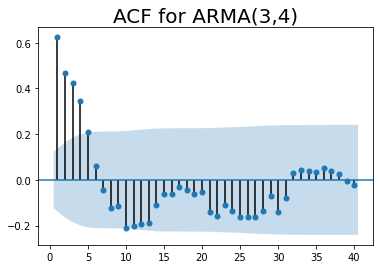

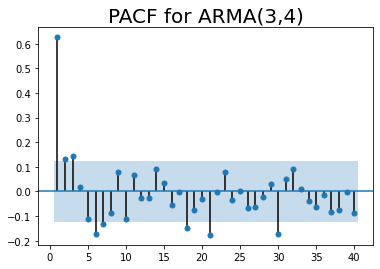

In [178]:
sgt.plot_acf(df['ARMA(3,4)'], lags=40, zero=False)
plt.title("ACF for ARMA(3,4)", size=20)
plt.show()
sgt.plot_pacf(df['ARMA(3,4)'], lags=40, zero=False);
plt.title("PACF for ARMA(3,4)", size=20)
plt.show()

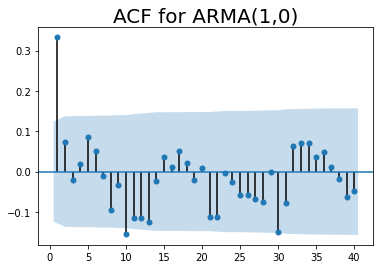

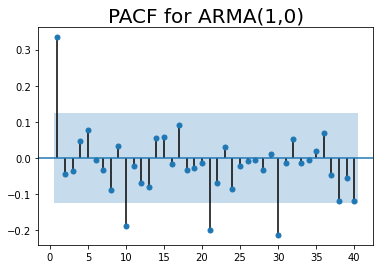

In [179]:
sgt.plot_acf(df['ARMA(1,0)'], lags=40, zero=False)
plt.title("ACF for ARMA(1,0)", size=20)
plt.show()
sgt.plot_pacf(df['ARMA(1,0)'], lags=40, zero=False);
plt.title("PACF for ARMA(1,0)", size=20)
plt.show()

For AR models we should use the $PACF$ graph to determine our best guess for the order of AR model.

For MA models we can use the number of nonzero coefficient from the $ACF$ to approximate the order of MA model.

On the plots for **ARMA(2,2)** we see that we should look for order 5 for MA model and order $\approx 3,4$ for AR. However, this plots are only the guide for the values to check. They are not the actuall values. We need to more analyse to actually find the best values.

On the plots for **ARMA(3,4)** we see that $ACF$ takes 4 nonzero values this means we should look for MA model of oreder 4, and that match our data. On the plot for $PACF$ we see 3 non zero values, then we should look for order 3 for AR model, and this is also correct for the generated data.

On the plots for **ARMA(1,0)** we see that only one value is significant sot he order of model should be around 1.

## Explain the process of fittingARMA(p,q)model to the generated data.

Let's create the model of the same order as the generated data and compare it with different model, we will do this for data generated for ARMA(2,2)

In [181]:
model_AR2_MA2 = ARMA(df['ARMA(2,2)'], (2, 2)).fit()
model_AR2_MA2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:              ARMA(2,2)   No. Observations:                  250
Model:                     ARMA(2, 2)   Log Likelihood                -359.632
Method:                       css-mle   S.D. of innovations              1.016
Date:                Sun, 17 May 2020   AIC                            731.264
Time:                        20:37:06   BIC                            752.392
Sample:                             0   HQIC                           739.767
                                                                              
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0096      0.084      0.115      0.909      -0.155       0.174
ar.L1.ARMA(2,2)     0.3123      0.062      5.049      0.000       0.191       0.434
ar.L2.ARMA(2,2)    -0.8061      0.045    -17.780      0.000      -0.895      -0.717
ma.L1.ARMA(2,2)     0.2876      0.074      3.889      0.000       0.143       0.433
ma.L2.ARMA(2,2)     0.6605      0.074      8.975      0.000       0.516       0.805
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.1937           -1.0968j            1.1138           -0.2222
AR.2            0.1937           +1.0968j            1.1138            0.2222
MA.1           -0.2177           -1.2111j            1.2305           -0.2783
MA.2           -0.2177           +1.2111j            1.2305            0.2783
-----------------------------------------------------------------------------
"""

We see that all 4  parameters are statistically significant, and the values of them are really close the the ones we provided for generation.
Note that the order of parameter is inverted. Now let's create smaller model - ARMA(1,2) and compare it.

In [182]:
model_AR1_MA2 = ARMA(df['ARMA(2,2)'], (1, 2)).fit()
model_AR1_MA2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:              ARMA(2,2)   No. Observations:                  250
Model:                     ARMA(1, 2)   Log Likelihood                -401.781
Method:                       css-mle   S.D. of innovations              1.199
Date:                Sun, 17 May 2020   AIC                            813.561
Time:                        20:39:20   BIC                            831.169
Sample:                             0   HQIC                           820.648
                                                                              
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0202      0.009      2.146      0.032       0.002       0.039
ar.L1.ARMA(2,2)     0.8350      0.037     22.491      0.000       0.762       0.908
ma.L1.ARMA(2,2)    -0.4180      0.048     -8.721      0.000      -0.512      -0.324
ma.L2.ARMA(2,2)    -0.5820      0.047    -12.472      0.000      -0.673      -0.491
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1976           +0.0000j            1.1976            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
MA.2           -1.7182           +0.0000j            1.7182            0.5000
-----------------------------------------------------------------------------
"""

In [183]:
llr_test2(model_AR1_MA2.llf, model_AR2_MA2.llf, DF=1)

0.0

We see that ARMA(2,2) is better for this data, the loglikelihood value is greater and the llr test passed for the higher order model. Let's see how about more complex model then (2,2).

In [184]:
model_AR3_MA3 = ARMA(df['ARMA(2,2)'], (3, 3)).fit()
model_AR3_MA3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:              ARMA(2,2)   No. Observations:                  250
Model:                     ARMA(3, 3)   Log Likelihood                -358.762
Method:                       css-mle   S.D. of innovations              1.012
Date:                Sun, 17 May 2020   AIC                            733.523
Time:                        20:40:39   BIC                            761.695
Sample:                             0   HQIC                           744.861
                                                                              
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0102      0.075      0.136      0.891      -0.137       0.157
ar.L1.ARMA(2,2)     0.5207      0.492      1.057      0.290      -0.444       1.486
ar.L2.ARMA(2,2)    -0.8377      0.170     -4.933      0.000      -1.171      -0.505
ar.L3.ARMA(2,2)     0.1476      0.407      0.363      0.717      -0.650       0.945
ma.L1.ARMA(2,2)     0.0311      0.485      0.064      0.949      -0.919       0.981
ma.L2.ARMA(2,2)     0.5529      0.144      3.841      0.000       0.271       0.835
ma.L3.ARMA(2,2)    -0.2184      0.325     -0.672      0.501      -0.855       0.418
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.2131           -1.1159j            1.1361           -0.2200
AR.2            0.2131           +1.1159j            1.1361            0.2200
AR.3            5.2484           -0.0000j            5.2484           -0.0000
MA.1           -0.2669           -1.1927j            1.2222           -0.2850
MA.2           -0.2669           +1.1927j            1.2222            0.2850
MA.3            3.0656           -0.0000j            3.0656           -0.0000
-----------------------------------------------------------------------------
"""

In [185]:
llr_test2(model_AR2_MA2.llf, model_AR3_MA3.llf, DF=2)

0.419

As we see in the ARMA model (3,3) the last values for the parameters are not statistically significant. And the preformed test, show that the (3,3) model isn't better then the (2,2). So far the best model is (2,2) - it is the same model we used for generating the data. To be more sure we could create matrix and compare more complex models.